In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/prathameshks/ML-From-Scratch/main/MNIST_DATA/train.csv')

In [23]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into test and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [24]:
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape = }")

X_train.shape = (784, 41000)
X_test.shape = (784, 1000)
Y_train.shape = (41000,)
Y_test.shape = (1000,)


In [40]:

def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(x):
    return np.maximum(0, x)

def softMax(x):
    exp_x = np.exp(np.maximum(x, -60))  # Clip values to prevent overflow
    sum_exp_x = np.sum(exp_x, axis=0)
    return exp_x / sum_exp_x

def forward_prop(w1,b1,w2,b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softMax(z2)
    return z1,a1,z2,a2

def one_hot(y):
    one_hot_y = np.zeros((y.size , y.max() + 1))
    one_hot_y[np.arange(y.size) , y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_ReLU(x):
    return x>0

def back_prop(w2, z1, a1, z2, a2,x, y):
    one_hot_y = one_hot(y)
    dz2 = a2-one_hot_y
    dw2 = 1/ m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)

    return dw1,db1,dw2,db2
    
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2


def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_decent(x,y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = back_prop(w2,z1,a1,z2,a2,x,y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if(i % 50 == 0):
            print("Iteration: ",i)
            predictions = get_predictions(a2)
            print("Accuracy: ",get_accuracy(predictions,y))
            
    return w1,b1,w2,b2


def make_predictions(x,w1,b1,w2,b2):
    _,_,_,a2 = forward_prop(w1,b1,w2,b2,x)
    predictions = get_predictions(a2)
    return predictions

def show_training_predictions(index,x,y,w1,b1,w2,b2):
    cur_img = x[:,index,None]
    prediction = make_predictions(cur_img,w1,b1,w2,b2)
    print("Prediction: ", prediction)
    print("Label: ", y[index])
    cur_img = cur_img.reshape((28,28))
    plt.imshow(cur_img, cmap='gray')
    plt.show()

def save(file,w1,b1,w2,b2):
    np.savez(file, w1=w1, b1=b1, w2=w2, b2=b2)
    
def load(file):
    npz = np.load(file)
    w1 = npz['w1']
    b1 = npz['b1']
    w2 = npz['w2']
    b2 = npz['b2']
    return w1,b1,w2,b2

In [26]:
# get testing accuracy

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size


In [27]:

model = gradient_decent(X_train, Y_train, 1000, 0.01)


Iteration:  0
[0 0 0 ... 7 7 0] [3 9 0 ... 7 7 0]
Accuracy:  0.16114634146341464
Iteration:  50
[4 7 0 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.2343658536585366
Iteration:  100
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.26663414634146343
Iteration:  150
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.28046341463414637
Iteration:  200
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.2919024390243902
Iteration:  250
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.30404878048780487
Iteration:  300
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.31558536585365854
Iteration:  350
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.3265609756097561
Iteration:  400
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.33778048780487807
Iteration:  450
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.3602439024390244
Iteration:  500
[4 7 3 ... 7 7 3] [3 9 0 ... 7 7 0]
Accuracy:  0.38497560975609757
Iteration:  550
[8 7 3 ... 7 7 5] [3 9 0 ... 7 7 0]
Accuracy:  0.40968292682926827
Iteration: 

In [30]:
w1,b1,w2,b2 = model

In [31]:
save('model.npz',w1,b1,w2,b2)

In [ ]:

w1,b1,w2,b2 = load('model.npz')

In [38]:
# test accuracy

_,_,_,a2 = forward_prop(w1,b1,w2,b2,X_test)
predictions = get_predictions(a2)
print("Accuracy: ",get_accuracy(predictions,Y_test))


[3 1 8 7 0 5 8 1 3 0 3 7 7 3 2 6 4 3 6 7 1 2 3 7 1 0 0 7 8 2 1 1 2 0 3 4 7
 7 9 5 4 4 1 3 6 2 0 7 4 2 0 0 8 9 2 5 7 6 3 5 9 0 9 4 9 3 3 7 1 2 9 0 1 9
 5 3 7 8 7 7 4 1 4 6 1 7 9 7 1 6 1 1 7 2 3 9 5 7 2 7 5 2 1 2 5 8 6 7 4 9 0
 1 8 7 1 7 4 5 2 3 3 1 1 0 0 0 8 7 5 6 4 4 6 7 6 8 5 7 3 4 0 7 4 3 5 4 0 1
 1 3 4 1 6 2 5 7 3 3 0 5 2 2 3 9 7 8 0 3 1 1 2 0 2 0 0 4 3 8 4 0 8 4 7 3 1
 2 7 7 7 4 1 6 9 9 3 2 5 0 7 4 6 6 9 6 9 7 0 7 7 7 0 7 7 5 7 2 0 0 9 0 4 7
 6 2 8 3 0 6 8 2 4 7 1 8 2 3 5 2 4 7 3 9 5 0 7 0 1 7 0 3 1 9 2 0 5 2 3 0 4
 7 2 9 0 5 4 7 3 3 4 4 7 8 7 3 8 3 7 8 9 4 9 7 4 7 2 1 8 4 6 9 0 3 7 2 3 8
 5 0 1 8 7 8 0 1 2 6 5 7 2 7 6 3 7 5 0 8 2 7 1 9 3 9 2 2 2 9 2 4 1 1 9 4 8
 7 2 1 0 7 8 1 7 2 1 9 2 9 4 3 2 4 7 7 1 1 6 0 3 0 0 2 8 5 5 0 0 6 4 3 9 0
 0 0 2 9 1 4 7 6 8 1 2 5 1 9 0 7 7 1 1 0 3 8 7 9 7 1 3 0 0 4 0 3 8 8 3 7 2
 3 5 7 8 7 1 3 7 4 2 4 7 4 4 2 3 5 0 3 6 6 1 8 2 3 4 5 1 1 6 6 2 4 0 7 0 7
 3 2 3 1 7 7 0 9 8 4 5 3 6 5 3 1 8 7 3 2 4 7 8 1 3 3 9 7 4 0 0 1 8 0 3 6 3
 0 1 8 2 3 0 4 3 7 8 4 3 

Prediction:  [7]
Label:  9


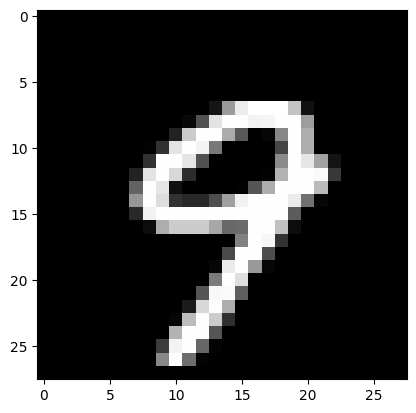

In [44]:
show_training_predictions(111,X_train,Y_train,w1,b1,w2,b2)